In [1]:
#1. Import Package

import os
import datetime
import IPython
import numpy as np
import pandas as pd
import seaborn as sns
import IPython.display
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout,Bidirectional
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed
set_seed(466)
np.random.seed(466)

In [2]:
#2. Load Data

csv_path = r'C:\Users\User\Desktop\AI_ML_TRAINING\YPAI09\Capstone\Capstone 1\Dataset\cases_malaysia.csv'

In [3]:
#2. Load data

df = pd.read_csv(csv_path, index_col='date',parse_dates=['date']) # cant open csv utk buka pathway


print(df.head())
print(df.info())

            cases_new  cases_import  cases_recovered  cases_active  \
date                                                                 
2020-01-25          4             4                0             4   
2020-01-26          0             0                0             4   
2020-01-27          0             0                0             4   
2020-01-28          0             0                0             4   
2020-01-29          3             3                0             7   

            cases_cluster  cases_unvax  cases_pvax  cases_fvax  cases_boost  \
date                                                                          
2020-01-25              0            4           0           0            0   
2020-01-26              0            0           0           0            0   
2020-01-27              0            0           0           0            0   
2020-01-28              0            0           0           0            0   
2020-01-29              0          

In [4]:
#MISSING VALUE CHECK
df.isna().sum()

cases_new                    0
cases_import                 0
cases_recovered              0
cases_active                 0
cases_cluster                0
cases_unvax                  0
cases_pvax                   0
cases_fvax                   0
cases_boost                  0
cases_child                  0
cases_adolescent             0
cases_adult                  0
cases_elderly                0
cases_0_4                    0
cases_5_11                   0
cases_12_17                  0
cases_18_29                  0
cases_30_39                  0
cases_40_49                  0
cases_50_59                  0
cases_60_69                  0
cases_70_79                  0
cases_80                     0
cluster_import             570
cluster_religious          570
cluster_community          570
cluster_highRisk           570
cluster_education          570
cluster_detentionCentre    570
cluster_workplace          570
dtype: int64

In [5]:
df['cases_new'] = pd.to_numeric(df['cases_new'],errors='coerce') 

In [6]:
df['cases_new'] = df['cases_new'].fillna(df['cases_new'].mean())
df['cluster_import'] = df['cases_new'].fillna(0)
df['cluster_religious'] = df['cases_new'].fillna(0)
df['cluster_community'] = df['cases_new'].fillna(0)
df['cluster_highRisk'] = df['cases_new'].fillna(0)
df['cluster_education'] = df['cases_new'].fillna(0)
df['cluster_detentionCentre'] = df['cases_new'].fillna(0)
df['cluster_workplace'] = df['cases_new'].fillna(0)

In [7]:
# df=df.drop(["cluster_import",'cluster_religious','cluster_community','cluster_highRisk',
#          'cluster_education','cluster_detentionCentre','cluster_workplace'], axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1744 entries, 2020-01-25 to 2024-11-02
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   cases_new                1744 non-null   int64
 1   cases_import             1744 non-null   int64
 2   cases_recovered          1744 non-null   int64
 3   cases_active             1744 non-null   int64
 4   cases_cluster            1744 non-null   int64
 5   cases_unvax              1744 non-null   int64
 6   cases_pvax               1744 non-null   int64
 7   cases_fvax               1744 non-null   int64
 8   cases_boost              1744 non-null   int64
 9   cases_child              1744 non-null   int64
 10  cases_adolescent         1744 non-null   int64
 11  cases_adult              1744 non-null   int64
 12  cases_elderly            1744 non-null   int64
 13  cases_0_4                1744 non-null   int64
 14  cases_5_11               1744 non-null

In [9]:
#MISSING VALUE CHECK
df.isna().sum()

cases_new                  0
cases_import               0
cases_recovered            0
cases_active               0
cases_cluster              0
cases_unvax                0
cases_pvax                 0
cases_fvax                 0
cases_boost                0
cases_child                0
cases_adolescent           0
cases_adult                0
cases_elderly              0
cases_0_4                  0
cases_5_11                 0
cases_12_17                0
cases_18_29                0
cases_30_39                0
cases_40_49                0
cases_50_59                0
cases_60_69                0
cases_70_79                0
cases_80                   0
cluster_import             0
cluster_religious          0
cluster_community          0
cluster_highRisk           0
cluster_education          0
cluster_detentionCentre    0
cluster_workplace          0
dtype: int64

In [10]:
# 2. Load Data
df.describe().transpose()

#from the dataset seen like there is no outliers. All look good

,count,mean,std,min,25%,50%,75%,max
cases_new,1744.0,3050.001720,5588.837322,0.0,128.75,803.0,3200.00,33406.0
cases_import,1744.0,22.502867,76.601202,0.0,1.00,3.0,8.00,719.0
cases_recovered,1744.0,3023.658257,5540.421141,0.0,117.75,796.5,3227.50,33872.0
cases_active,1744.0,37942.768922,61800.088695,1.0,8460.25,13839.0,36568.00,323791.0
cases_cluster,1744.0,306.498280,619.205875,0.0,0.00,7.0,269.25,3394.0
cases_unvax,1744.0,1172.648509,2339.900620,0.0,24.00,125.0,1162.75,12681.0
cases_pvax,1744.0,250.495413,997.565343,0.0,0.00,2.0,19.00,7315.0
cases_fvax,1744.0,813.951261,1935.319149,0.0,1.00,44.0,439.00,13058.0
cases_boost,1744.0,812.906537,2248.538349,0.0,0.00,83.0,496.25,18176.0
cases_child,1744.0,371.459289,772.875075,0.0,8.75,48.0,245.25,4389.0


In [11]:
df

,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,cases_child,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
date,,,,,,,,,,,,,,,,,,,,,
2020-01-25,4,4,0,4,0,4,0,0,0,0,...,0,0,0,4,4,4,4,4,4,4
2020-01-26,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-27,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-28,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-29,3,3,0,7,0,3,0,0,0,1,...,0,0,0,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-29,146,0,150,8708,0,27,0,29,90,12,...,3,3,13,146,146,146,146,146,146,146
2024-10-30,157,1,168,8697,0,27,2,37,91,13,...,7,3,14,157,157,157,157,157,157,157
2024-10-31,102,1,149,8650,0,24,0,19,59,11,...,3,4,11,102,102,102,102,102,102,102


<Axes: xlabel='date'>

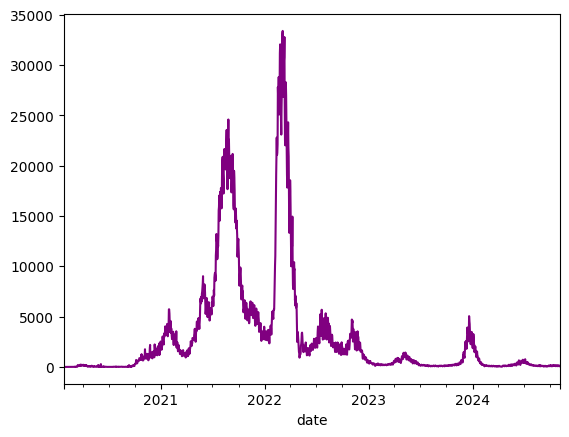

In [12]:
df['cases_new'].plot(color='purple')

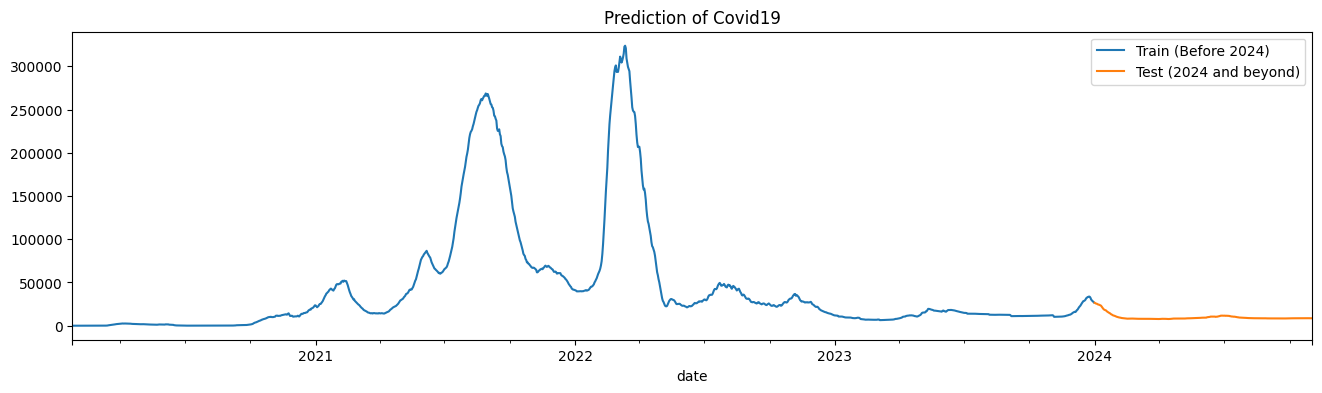

In [13]:
tstart = 2020
tend = 2023

def train_test_plot(df,tstart,tend):
    df.loc[f'{tstart}':f'{tend}','cases_active'].plot(figsize=(16,4),label=f"Train (Before {tend+1})")
    df.loc[f'{tend+1}':, 'cases_active'].plot(figsize=(16,4),label=f"Test ({tend+1} and beyond)")
    plt.legend()
    plt.title('Prediction of Covid19')
    plt.show()

train_test_plot(df,tstart,tend)

In [14]:
def train_test_split(df,tstart,tend):
    train = df.loc[f"{tstart}":f"{tend}","cases_new"].values
    test = df.loc[f"{tend+1}":,"cases_new"].values
    return train,test

training_set,test_set = train_test_split(df,tstart,tend)

In [15]:
sc = MinMaxScaler(feature_range=(0,1))
training_set = training_set.reshape(-1,1)
training_set_scaled = sc.fit_transform(training_set)
# print(type(training_set_scaled))
# print(training_set_scaled.shape)
print(training_set_scaled[:5])

[[1.19738969e-04]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [8.98042268e-05]]


In [16]:
arr = np.array([1,2,3,4,5,6])
print(arr.shape)

print(arr.reshape(3,-1).shape)

(6,)
(3, 2)


In [17]:
def split_sequence(sequence,n_steps):
    X,y = list(),list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x,seq_y = sequence[i:end_ix],sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X),np.array(y)

n_steps = 30
features = 1
# split into samples
X_train,y_train = split_sequence(training_set_scaled,n_steps)

In [18]:
# Reshape X_train for model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],features)
print(X_train.shape)

(1407, 30, 1)


In [19]:
# The LSTM Architecture
model_lstm = keras.Sequential()
model_lstm.add(keras.layers.LSTM(32,activation='tanh',input_shape=(n_steps,features), return_sequences = True)) #wajib ada return_sequential dalam lstm
model_lstm.add(Dropout(0.01))
model_lstm.add(LSTM(units=64))
model_lstm.add(keras.layers.Dense(1))

c:\Users\User\anaconda3\envs\tensorflow\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,249 (114.25 KB)

 Trainable params: 29,249 (114.25 KB)

 Non-trainable params: 0 (0.00 B)

None


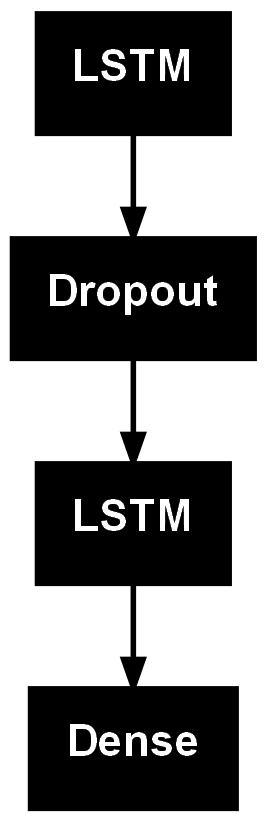

In [20]:

# Compiling the model

model_lstm.compile(optimizer='adam',loss='mse', metrics =['mae'])
print(model_lstm.summary())
keras.utils.plot_model(model_lstm)

In [21]:
es = keras.callbacks.EarlyStopping (patience=2, verbose=1)
logpath = 'tensorboard/covid19latest/' + datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S')
tb= keras.callbacks.TensorBoard(logpath)
history = model_lstm.fit(X_train,
                         y_train,
                        epochs = 50,
                        batch_size=32,
                        callbacks= [es, tb])

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0145 - mae: 0.0578
Epoch 2/50
13/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0017 - mae: 0.0199

c:\Users\User\anaconda3\envs\tensorflow\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0016 - mae: 0.0197
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0014 - mae: 0.0200
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011 - mae: 0.0171
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011 - mae: 0.0175
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011 - mae: 0.0169
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011 - mae: 0.0168
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0010 - mae: 0.0164   
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0010 - mae: 0.0167   
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.9573e-04 - mae: 0.0169
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.9063e-04 - mae: 0.0163
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.6026e-04 - mae: 0.0167
Epoch 13/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.3391e-04 - mae: 0.0160
Epoch 14/50
44/44 ━━━━━━━━━━━━━━━━━━━

In [22]:
df_total = df.loc[:,'cases_new']
inputs = df_total[len(df_total) - len(test_set) - n_steps :].values
inputs = inputs.reshape(-1,1)
# scaling
inputs = sc.transform(inputs)

# Split into samples
X_test,y_test = split_sequence(inputs,n_steps)
# reshape
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],features)
# predictions
predicted_new_cases_covid19 = model_lstm.predict(X_test)
# inverse transform the values - undo the normalization of stock prices (undo any sklearn's transform)
predicted_new_cases_covid19 = sc.inverse_transform(predicted_new_cases_covid19)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [23]:
def plot_predictions(test,predicted):
    plt.plot(test,color='gray',label='Real')
    plt.plot(predicted,color='red',label='Predicted')
    plt.title('Covid19 Prediction')
    plt.xlabel('Day')
    plt.ylabel('Covid-19 New cases')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = np.sqrt(mean_squared_error(test,predicted))
    print('The root mean square error is {:.2f}.'.format(rmse))

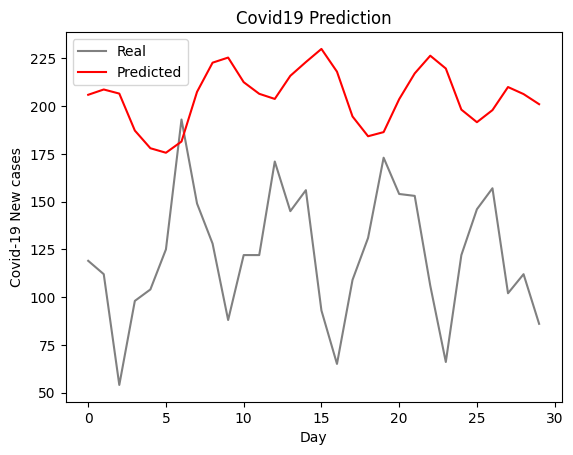

In [24]:
plot_predictions(test_set[-30:],predicted_new_cases_covid19[-30:])

In [25]:
#Evaluation model
evaluation = model_lstm.evaluate(X_test, y_test)
print(evaluation)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.2782e-05 - mae: 0.0049  
[3.035963891306892e-05, 0.003571341745555401]


In [26]:
mae= evaluation[1]
print(mae)

0.003571341745555401


In [27]:
mape = (mae/sum(abs(y_test))) * 100
print(mape)

[0.13320558]
